# Assignment 4 (Theory of NNs)

In this homework, we will explore the basics of neural networks.

## Conda Setup

Generate the conda environment by running in the terminal:

`conda create --name gcv_exercise_4 python=3.8`

Run to activate environment:

`conda activate gcv_exercise_4`

Install all required packages for this exercise by running:

`conda install matplotlib numpy scikit-image scikit-learn`

Install Jupyter Notebook requirements:

`conda install -n gcv_exercise_4 ipykernel --update-deps --force-reinstall`

(Optional) If you are working on the TUWEL Juypter Notebooks:

`ipython kernel install --name "GCV_E_4" --user`

## Notebook Setup & Imports

In [50]:
# Setup

# The Random module implements pseudo-random number generators
import math
import random 
from random import randint
from tqdm import trange
# Numpy is the main package for scientific computing with Python. 
# This will be one of our most used libraries in this class
import numpy as np

# Import the Scikit-Image and -Learn library
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from skimage.transform import resize
from PIL import Image 
# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt

# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# set random seeds
np.random.seed(42)
random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 1: Perceptron

The perceptron is one of the simplest and oldest algorithms in machine learning. It is a type of artificial neural network that was introduced by Frank Rosenblatt. The perceptron is used for binary classification problems where the goal is to separate two classes of data using a linear boundary. The algorithm updates the weights of the inputs to adjust the boundary until the correct classification is achieved.

### Dataset

We use a similar dataset to exercise 3, however, as the perceptron can only seperate 2 classes we will only use 2 centers.

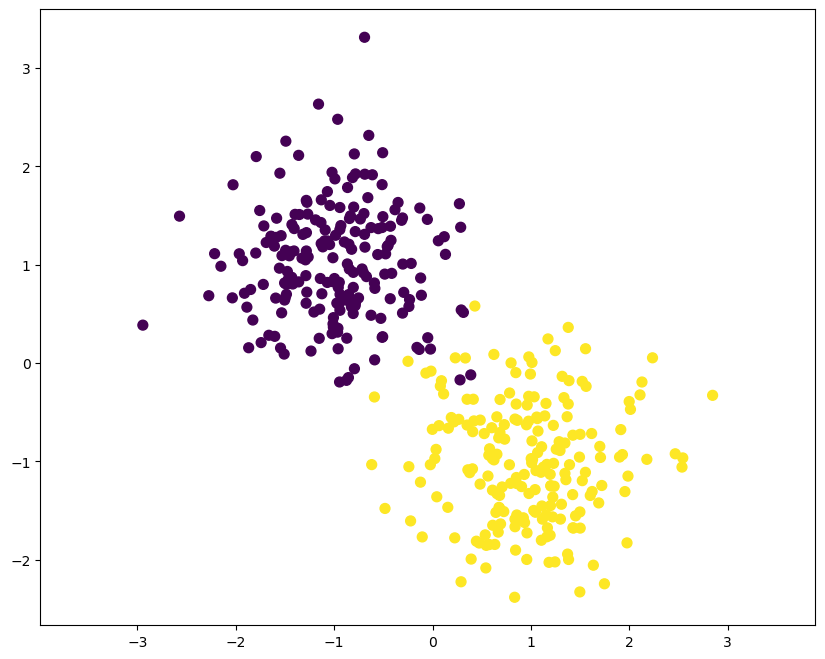

In [51]:
# Generate random data points for clustering
n_samples = 400
centers = [[-1, 1], [1, -1]]
std = 0.6

#generate dataset
X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=std, random_state=42)

y[y==0] = -1

#split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.axis('equal')
plt.show()

### Perceptron Implementation

Here you will implement the:

- Perceptron (`perc()`)
- Perceptron weight update (`fit()`)

Function Description (`perc()`)

The perc function should implement the perceptron algorithm for predicting the class labels of input vectors. The function should take as input a numpy ndarray X of shape (n_samples, n_features) and use the weight vector self.w to compute the output of the perceptron for each sample. The output of the perceptron for each sample should be computed as the dot product of the sample and the weight vector self.w. The function should then apply a threshold function to the output to obtain the predicted class label for each sample. The threshold function should return -1 for all values less than zero and 1 for all values greater than or equal to zero. The predicted class labels should be returned as a numpy ndarray of shape (n_samples,).

Function Description (`fit()`)

The fit function should implement the training algorithm for the single layer perceptron. The function should initialize the weight vector self.w with zeros and then loop through the training data for the specified number of epochs. In each epoch, the function should calculate the predictions for all samples in X using the perc method, and then compare them with the ground truth labels y to calculate the prediction error. If there are any misclassifications, the function should randomly select one misclassified sample and update the weights using the perceptron learning rule. After each epoch, the function should append the number of misclassifications to a list miss_classifications. Finally, the function should return the miss_classifications list.

In [52]:
class Perceptron:
    """Implements the single layer perceptron.
    """

    def __init__(self, lr=0.5, epochs=10000):
        """Initialize perceptron with learning rate and epochs.

        Args:
            lr (float): Learning rate
            epochs (int): Number of training epochs
            
        Attributes:
            w (numpy.ndarray): Weights of the perceptron

        """
        self.lr = lr
        self.epochs = epochs
        self.w = None

    def perc(self, X):
        """ Perceptron function.

        Args:
            X (numpy.ndarray): input vectors

        Returns:
            class labels of X
        """
        # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
        # use the np library
        dot_prod = np.dot(X, self.w)
        threshould = 0
        # initialize the labels
        class_labels = np.zeros(X.shape[0])
        # for each dot product, compare to threshold
        for i in range(dot_prod.shape[0]):
            if dot_prod[i] > threshould:
                class_labels[i] = 1
            else:
                class_labels[i] = -1

        return class_labels
        # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****

    def fit(self, X, y):
        """ Training function.

        Args:
            X (numpy.ndarray): Inputs.
            y (numpy.ndarray): labels/target.

        Returns:
            List of the number of miss-classifications per epoch
        """

        # n_observations -> number of training examples
        # m_features -> number of features
        n_observations, m_features = X.shape

        #Initialize weights with zero
        self.w = np.zeros(m_features)

        # Empty list to store how many examples were
        # misclassified at every iteration.
        miss_classifications = []

        # Training.
        for epoch in trange(self.epochs):

            # predict all items from the dataset
            predictions = self.perc(X)
            # compare with gt
            error = y - predictions

            if ((error == 0).all()):
                print(f'No errors after {epoch} epochs. Training successful!')
            else:
                #sample one prediction at random
                n = randint(0, n_observations - 1)
                prediction_for_update = self.perc(np.reshape(X[n, :], (1,2)))
                
                # update the weights of the perceptron from the random sample
                # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
                # the difference between the predicted and the true value
                difference = y[n] - prediction_for_update
                # update the weigths
                self.w = self.w + self.lr * difference * X[n]
                # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****

            # Appending number of misclassified examples
            # at every iteration.
            miss_classifications.append(error.shape[0] - np.sum(error == 0))

        return miss_classifications

    def predict(self, X):
        """ Prediction function.

        Args:
            X (numpy.ndarray): Inputs.

        Returns:
            Class label of X
        """
        approx = self.perc(X)
        return np.sign(approx)

### Perceptron Training and Visualization

You shouldn't need to change any code here. The code should produce a plot similar to this:

<img src="imgs/example_output_perc.png" alt="Plot" width="960" />

100%|██████████| 10000/10000 [00:00<00:00, 18260.17it/s]


[[60  0]
 [ 1 59]]
Accuracy on the testset: 0.9916666666666667


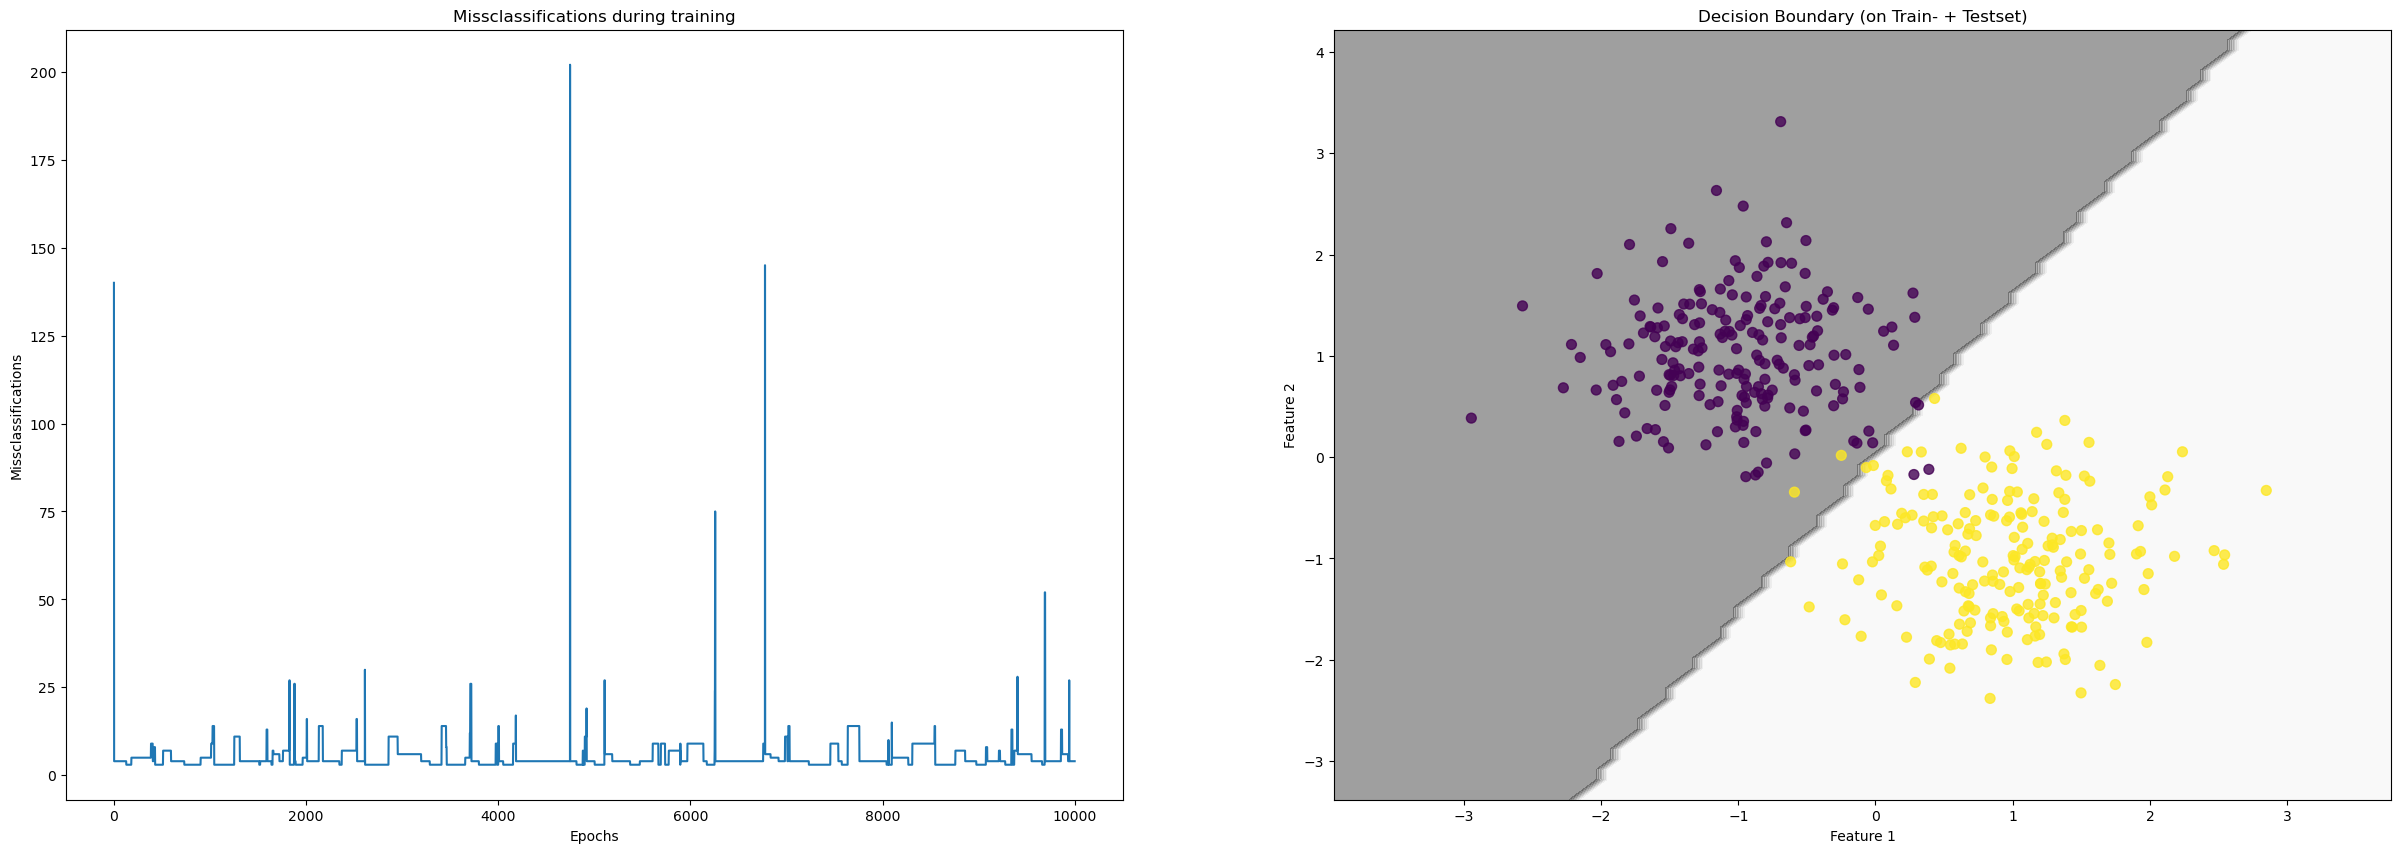

In [53]:
perceptron = Perceptron(lr=0.01)

miss_list = perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
acc = accuracy_score(y_val,y_pred)

print("Accuracy on the testset:", acc)

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

axs[0].plot(miss_list)
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Missclassifications')
axs[0].set_title('Missclassifications during training')

# Create grid of points covering entire feature space
xx, yy = np.meshgrid(np.arange(X[:,0].min()-1, X[:,0].max()+1, 0.1),
                     np.arange(X[:,1].min()-1, X[:,1].max()+1, 0.1))

# Apply trained perceptron to each point on the grid
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
axs[1].contourf(xx, yy, Z, alpha=0.4)
axs[1].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, s=50, cmap='viridis')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')
axs[1].set_title('Decision Boundary (on Train- + Testset)')
plt.show()

## Convolutional Neural Network



### Loss function and activation function

__Loss Function__:
A loss function, also known as a cost function or objective function, is a measure of how well a machine learning model is performing on a given task. The goal of a machine learning algorithm is to minimize the value of the loss function, which is achieved by adjusting the model's parameters during training. Different types of machine learning problems require different types of loss functions. For example, for a classification task, a common loss function is cross-entropy loss, which measures the difference between the predicted probability distribution and the true distribution of labels. For a regression task, mean squared error (MSE) is a common loss function, which measures the average squared difference between the predicted values and the true values.

__Activation Function__:
An activation function is a mathematical function that is applied to the output of each neuron in a neural network. The purpose of the activation function is to introduce nonlinearity into the model, which allows it to learn more complex patterns in the data. Some common activation functions include the sigmoid function, which maps the input to a value between 0 and 1, and the ReLU (rectified linear unit) function, which returns the input if it is positive and 0 otherwise. Different activation functions can be used in different layers of a neural network, depending on the requirements of the specific task and the architecture of the network. You will implement the sigmoid loss function and its derivative for this lecture.

__Loss functions are out of scope for this exercise and are provided__.

<!DOCTYPE html>
<html>
<head>
  <title>My Page</title>
  <style>
    figure {
      margin: 0;
      padding: 0;
    }

    img {
      display: block;
      margin: auto;
    }

    figcaption {
      font-size: 25px;
      color: #666;
      text-align: center;
      margin-top: 10px;
    }
  </style>
</head>
<body>
<div style="background-color: white;">
  <figure>
    <center><img src="imgs/sigmoid.svg" alt="Plot" width="960" /></center>
    <figcaption>Sigmoid function</figcaption>
  </figure>
</div>
</body>
</html>


In [54]:
class SquareLoss(object):

    def __init__(self):
        pass

    def loss(self, y, y_pred):
        return 0.5 * np.power((y - y_pred), 2)

    def delta(self, y, y_pred):
        return -(y - y_pred)

    def calculate_accuracy(self, y_pred, y):
        y_pred = y_pred[:, 0]
        assert y.ndim == 1 and y.size == y_pred.size
        y_pred = y_pred > 0.5
        return (y == y_pred).sum().item() / y.size

def sigmoid(x):
    """
    Compute the output of the Sigmoid activation function.
    """
    # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
    return 1/(1 + np.exp(-x))
    # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****


def sigmoid_derivative(x):
    """
    Compute the derivative of the sigmoid activation function.
    """
    # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
    return sigmoid(x) * (1 - sigmoid(x) )
    # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****

### Convolution

You already implemented basic (handcrafted) convolutions in `exercise 2`, now you will implement learned convolutions with a forward pass and a backward pass. In exercise 2, you learned how to perform basic convolutions using pre-defined filters or kernels. In this exercise, you will take it a step further and implement learned convolutions, where the model learns the filters or kernels during training instead of using pre-defined ones.

To do this, you will implement a forward pass (provided) and add a backward pass for the learned convolution layer. The forward pass involves taking the input data and passing it through the convolution layer, which applies the learned filters to the input and produces an output feature map. The backward pass involves calculating the gradients of the loss with respect to the input and the parameters of the convolution layer, which allows the weights to be updated during training using backpropagation.

By implementing learned convolutions, the model can learn to extract more complex features from the input data, which can lead to better performance on the task at hand. However, this also means that there are more parameters to learn and optimize during training, which can be computationally expensive and require a lot of training data. 

In this exercise, you won't actually be training the model to convergence. Instead, you will perform a single forward pass and backward pass through the learned convolution layer, and compare the resulting gradients to the expected gradients that are provided to you. This will allow you to verify that your implementation of the convolution layer is correct and that the gradients are being computed accurately. 

#### Implement Forward- and Backwardpass for the Convolution-Layer

In [55]:
class Convolutional:
    """
    A class representing a convolutional layer.

    Attributes:
    -----------
    name: str
        The name of the convolutional layer.
    num_filters: int, default=16
        The number of filters in the convolutional layer.
    stride: int, default=1
        The stride of the convolutional layer.
    size: int, default=3
        The size of the filters in the convolutional layer.
    activation: str or None, default=None
        The activation function to apply after the convolution operation.
    last_input: numpy array or None
        The input to the last forward pass through the layer.
    leakyReLU: numpy vectorize function
        A vectorized implementation of the LeakyReLU activation function.
    leakyReLU_derivative: numpy vectorize function
        A vectorized implementation of the derivative of the LeakyReLU activation function.
    filters: numpy array
        The filters for the convolutional layer.

    Methods:
    -------
    forward(image):
        Perform a forward pass through the convolutional layer.
    backward(din, learn_rate):
        Perform a backward pass through the convolutional layer.
    get_weights():
        Return the weights of the convolutional layer.

    Examples:
    ---------
    >>> conv = Convolutional(name='conv_layer')
    >>> conv.forward(np.random.randn(32, 28, 28))
    array([[[...], [...], ... , [...]], [[...], [...], ... , [...]], ... , [[...], [...], ... , [...]]])
    >>> conv.backward(np.random.randn(16, 26, 26), learn_rate=0.001)
    array([[[...], [...], ... , [...]], [[...], [...], ... , [...]], ... , [[...], [...], ... , [...]]])
    >>> conv.get_weights()
    array([...])
    """

    def __init__(self, name, num_filters=16, stride=1, size=3, activation=None):
        """
        Initializes a new instance of the Convolutional class.

        Args:
            name (str): The name of the convolutional layer.
            num_filters (int): The number of filters to apply.
            stride (int): The stride used for the convolution.
            size (int): The size of the filters.
            activation (str): The activation function to use (e.g. "relu" or "sigmoid").
        """
        self.name = name
        limit = 1 / math.sqrt(num_filters)
        np.random.seed(42)
        self.filters = np.random.uniform(-limit, limit, (num_filters, size, size))
        self.stride = stride
        self.size = size
        self.activation = activation
        self.last_input = None
        self.leaky_relu = np.vectorize(sigmoid)
        self.leaky_relu_derivative = np.vectorize(sigmoid_derivative)

    def forward(self, image):
        """
        Applies the convolution operation to the input image and returns the output.

        Args:
        -----
        image : numpy.ndarray of shape (n_channels, input_dimension, input_dimension)
            The input image to the convolutional layer.

        Returns:
        --------
        out : numpy.ndarray of shape (n_filters, output_dimension, output_dimension)
            The output of the convolution operation after applying filters to the input image.
        """
        self.last_input = image                             # keep track of last input for later backward propagation

        input_dimension = image.shape[1]                                                # input dimension
        output_dimension = int((input_dimension - self.size) / self.stride) + 1         # output dimension

        out = np.zeros((self.filters.shape[0], output_dimension, output_dimension))     # create the matrix to hold the
                                                                                        # values of the convolution

        for f in range(self.filters.shape[0]):              # convolve each filter over the image,
            tmp_y = out_y = 0                               # moving it vertically first and then horizontally
            while tmp_y + self.size <= input_dimension:
                tmp_x = out_x = 0
                while tmp_x + self.size <= input_dimension:
                    patch = image[:, tmp_y:tmp_y + self.size, tmp_x:tmp_x + self.size]
                    out[f, out_y, out_x] += np.sum(self.filters[f] * patch)
                    tmp_x += self.stride
                    out_x += 1
                tmp_y += self.stride
                out_y += 1
        if self.activation == 'relu':                       # apply ReLU activation function
            self.leaky_relu(out)
        return out

    def backward(self, din, learn_rate=0.005):
        """
        Performs backward propagation through the convolutional layer and returns the loss gradient 
        for this layer's inputs.

        Args:
        -----
        din : numpy.ndarray of shape (n_filters, output_dimension, output_dimension)
            The loss gradient from the layer above.
        learn_rate : float, optional
            The learning rate to be used during gradient descent.

        Returns:
        --------
        dout : numpy.ndarray of shape (n_channels, input_dimension, input_dimension)
            The loss gradient for this layer's inputs.
        """
        input_dimension = self.last_input.shape[1]          # input dimension

        if self.activation == 'relu':                       # back propagate through ReLU
           self.leaky_relu_derivative(din)

        dout = np.zeros(self.last_input.shape)              # loss gradient of the input to the convolution operation
        dfilt = np.zeros(self.filters.shape)                # loss gradient of filter

        for f in range(self.filters.shape[0]):              # loop through all filters
            # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
            # Here I just took the code from the new version regarding 
            # the loopinh through the matrix and finding a patch
            tmp_y = out_y = 0
            while tmp_y + self.size <= input_dimension:
                tmp_x = out_x = 0
                while tmp_x + self.size <= input_dimension:

                    patch = self.last_input[:, tmp_y:tmp_y + self.size, tmp_x:tmp_x + self.size]
                    # looking at the area, where the convolution was applied 
                    # add din (at the selected filter and position) * the selected filter
                    dout[:, tmp_y:tmp_y + self.size, tmp_x:tmp_x + self.size] += din[f, out_y, out_x] * self.filters[f]
                    #  extract the patch from the input of the convolution
                    #  multiply it by the value of din at the current position and filter, of that you take the sum.
                    #  add it to dfilt for the currently selected filter.
                    for i in range(patch.shape[0]):
                        dfilt[f] += patch[i] * din[f, out_y, out_x]
                


                        
                    tmp_x += self.stride
                    out_x += 1
                tmp_y += self.stride
                out_y += 1
            # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****
        self.filters -= learn_rate * dfilt                  # update filters using SGD
        return dout                                         # return the loss gradient for this layer's inputs

    def get_weights(self):
        """
        Returns the filters of the convolutional layer as a 1D numpy array.

        Returns:
        --------
        weights : numpy.ndarray of shape (n_filters * n_channels * filter_size * filter_size)
            The filters of the convolutional layer, flattened into a 1D array.
        """
        return np.reshape(self.filters, -1)

### CNN "Training"

You shouldn't need to change any code here.

In [56]:
loss = SquareLoss()

# Load example image, convert it to numpy and normalize to 0 and 1
im = np.array(Image.open("imgs/Sneaker.png"))/255

# Create a one-hot encoding for example image
# ['Sandal', 'Shirt', 'Sneaker', 'Ankle boot']
one_hot_label = [0, 0, 1, 0]

layers = []
gradients = []

layers.append(Convolutional(name='conv1', num_filters=8, stride=2, size=3, activation='relu'))
layers.append(Convolutional(name='conv2', num_filters=8, stride=2, size=3, activation='relu'))
layers.append(Convolutional(name='conv3', num_filters=4, stride=2, size=6, activation='relu'))

im.resize(28, 28, 1)
print("Initial image shape:", im.shape)

# Output:
# Initial image shape: (28, 28, 1)
# Image shape after convolution: (8, 13, 13)
# Image shape after convolution: (8, 6, 6)
# Image shape after convolution: (8, 3, 3)
# Image shape after convolution: (4, 1, 1)

# We need to switch the channels here [H, W, C] --> [C, H, W], this is the standard notation in PyTorch.
image = np.transpose(im, [2,0,1])
for layer in layers:
    image = layer.forward(image)
    print("Image shape after convolution:", image.shape)

prediction = image.flatten()

gradient = loss.delta(one_hot_label, prediction)[:, np.newaxis, np.newaxis]
gradients.append(gradient)
for layer in reversed(layers):
    gradient = layer.backward(gradient, 0.01)
    gradients.append(gradient)


# Output:
# conv3: (4, 1, 1)
# pool1: (8, 3, 3)
# con2: (8, 6, 6)
# conv1: (8, 13, 13)
# Input: (1, 28, 28)
for gradient_ in gradients:
    print("Gradient Shape:", gradient_.shape)
    print("Average of the gradients:", np.mean(gradient_))

assert (
    np.allclose(np.mean(gradients[0]), -1.2905208223751978)
), "Check convolution backpropagation"
assert (
    np.allclose(np.mean(gradients[1]), -0.037528696866114104)
), "Check convolution backpropagation"
assert (
    np.allclose(np.mean(gradients[2]), 0.01303134540076784)
), "Check convolution backpropagation"
assert (
    np.allclose(np.mean(gradients[3]), -0.0045789918817542435)
), "Check convolution backpropagation"

Initial image shape: (28, 28, 1)
Image shape after convolution: (8, 13, 13)
Image shape after convolution: (8, 6, 6)
Image shape after convolution: (4, 1, 1)
Gradient Shape: (4, 1, 1)
Average of the gradients: -1.2905208223751978
Gradient Shape: (8, 6, 6)
Average of the gradients: -0.037528696866114104
Gradient Shape: (8, 13, 13)
Average of the gradients: 0.01303134540076784
Gradient Shape: (1, 28, 28)
Average of the gradients: -0.0045789918817542435
